# TelecomChurn Analysis And Prediction

In [1]:
%matplotlib inline 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import seaborn as sns  # Visuvalization & plotting

from sklearn.svm import SVC  # supervised learning methods used for classification, regression

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1



# Read csv file

In [2]:
Tdata = pd.read_csv("churn.csv")
Tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print ("Rows     : " ,Tdata.shape[0])
print ("Columns  : " ,Tdata.shape[1])

Rows     :  7043
Columns  :  21


In [4]:
Tdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA (Exploratary Data Analysis)

# Variable Identification :

In [5]:
def df_summary(df):
  df_U = df.nunique()
  df_M = df.isnull().sum()
  df_I = df.dtypes
  df_U = df_U.to_frame().reset_index()
  df_M = df_M.to_frame().reset_index()
  df_I = df_I.to_frame().reset_index()
  df_U = df_U.rename(columns= {0: 'Unique Data'})
  df_M = df_M.rename(columns= {0: 'Missing Data'})
  df_I = df_I.rename(columns= {0: 'Data Types'})
  output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
  return output;

In [6]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


In [7]:
Tdata.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [8]:
Tdata.TotalCharges= pd.to_numeric(Tdata.TotalCharges, errors='coerce')
Tdata.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [9]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


# Missing values treatment

In [10]:
Tdata['TotalCharges'].fillna((Tdata['TotalCharges'].mean()), inplace=True)
Tdata['TotalCharges'].isnull().sum()
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


TotalCharges col was having float values but its data type was wrongly considered as object .
So we converted its data type as float.After converting its data type, we discovered 11 null values .
We replaced the null values with mean value of TotalCharges col.

In [11]:
Tdata.drop('customerID',axis=1, inplace=True)
Tdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
Num_cols = Tdata.select_dtypes(include=['float64','int64']).columns.tolist()
Cat_cols = Tdata.select_dtypes(include=['object']).columns.tolist()
print("Number columns : ",Num_cols , "Catogarical columns :" ,Cat_cols,sep="\n")

Number columns : 
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Catogarical columns :
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
Tdata[Num_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Univariate Analysis

Text(0, 0.5, 'Frequency')

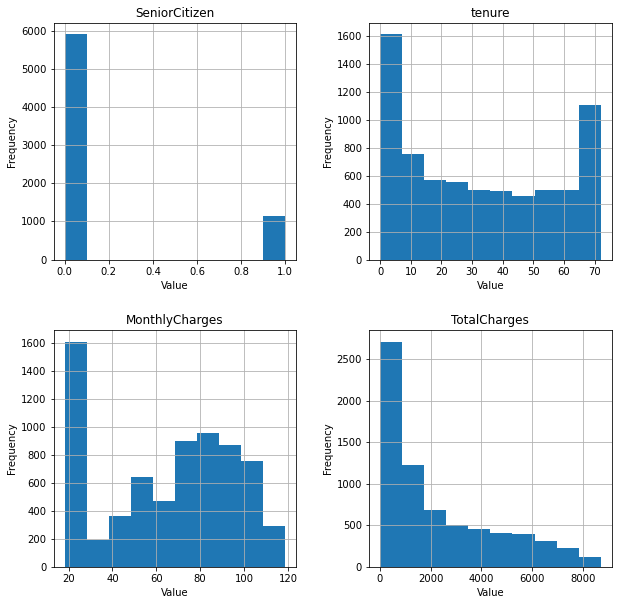

In [14]:
plt=Tdata[Num_cols].hist(figsize = (10,10));

plt[0][0].set_xlabel("Value")
plt[0][0].set_ylabel("Frequency")
plt[0][1].set_xlabel("Value")
plt[0][1].set_ylabel("Frequency")
plt[1][0].set_xlabel("Value")
plt[1][0].set_ylabel("Frequency")
plt[1][1].set_xlabel("Value")
plt[1][1].set_ylabel("Frequency")


In [15]:
def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")

In [16]:
cat_col_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Female', 'Male'}
Variable : Partner
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : Dependents
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : PhoneService
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : MultipleLines
Count of unique values : 3
Unique values :  {'No phone service', 'Yes', 'No'}
Variable : InternetService
Count of unique values : 3
Unique values :  {'DSL', 'Fiber optic', 'No'}
Variable : OnlineSecurity
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : OnlineBackup
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : DeviceProtection
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : TechSupport
Count of unique values : 3
Unique values :  {'No internet service', 'Yes', 'No'}
Variable : StreamingTV
Count of unique values : 3
Un

# Bivariate Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

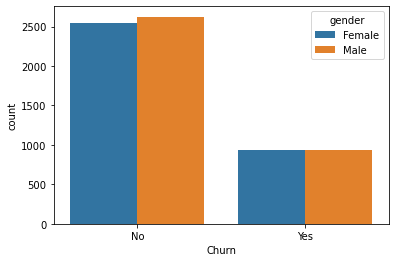

In [17]:
sns.countplot(x="Churn", hue="gender", data=Tdata)

In [18]:
Binary_class = Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() == 2].keys().tolist()
Multi_class =  Tdata[Cat_cols].nunique()[Tdata[Cat_cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


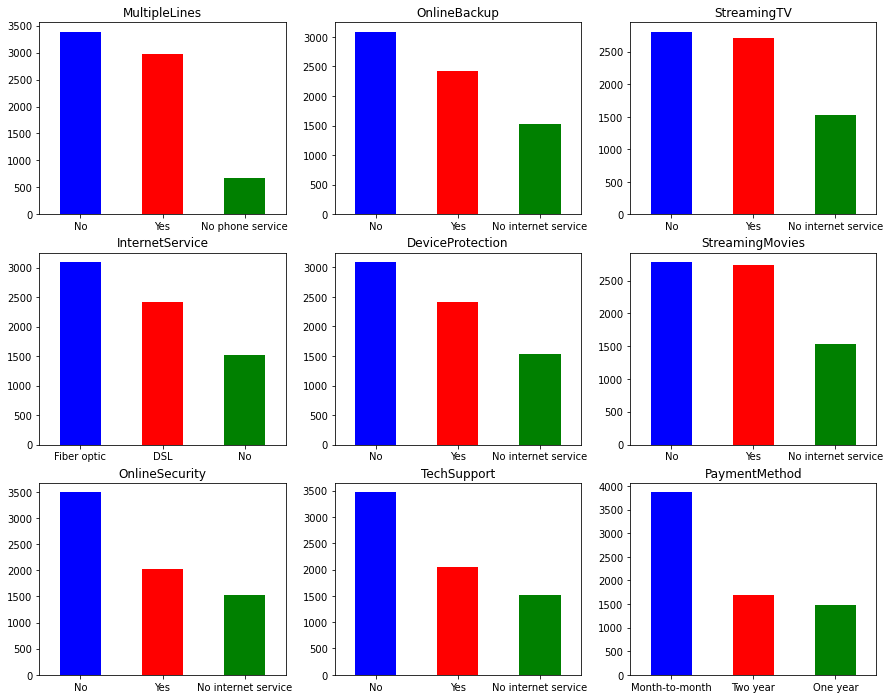

In [22]:
cr=['b','r','g']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(Multi_class):
    if i < 3:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0,color=cr)
        
    elif i >=3 and i < 6:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0,color=cr)
        
    elif i < 9:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0,color=cr)
    ax.set_title(item)

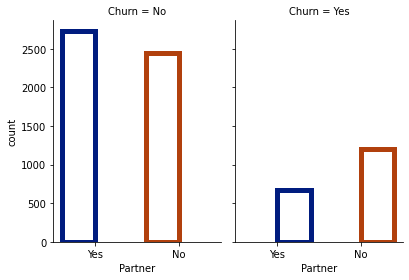

In [23]:
sns.catplot(x="Partner", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

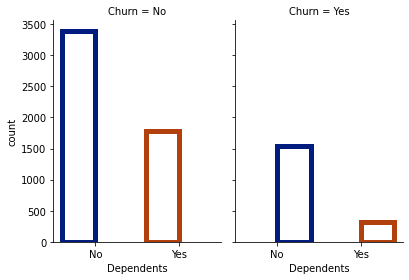

In [24]:
sns.catplot(x="Dependents", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

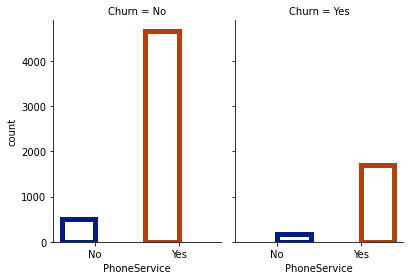

In [25]:
sns.catplot(x="PhoneService", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

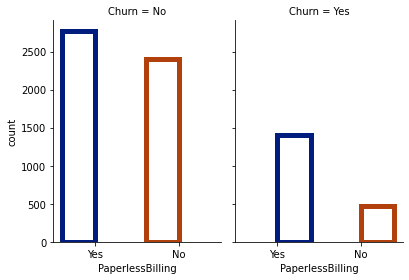

In [26]:
sns.catplot(x="PaperlessBilling", hue="Churn", col="Churn",data=Tdata, kind="count",height=4, aspect=.7,  facecolor=(0, 0, 0, 0),
linewidth=5,edgecolor=sns.color_palette("dark", 5))

# Variable Transformation & Creation

In [19]:
#Label encoding Binary columns
le = LabelEncoder()
for i in Binary_class :
    Tdata[i] = le.fit_transform(Tdata[i])

LabelEncoder : converts the categorial information into numeric information and the index starts from 0.(in our ase 0,1)

In [20]:
Tdata[Binary_class].shape

(7043, 6)

In [21]:
Tdata[Binary_class]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


In [22]:
Tdata[Num_cols].shape

(7043, 4)

In [23]:
Tdata[Num_cols]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [24]:
# Split multi class catergory columns as dummies  
Tdata_Dummy = pd.get_dummies(Tdata[Multi_class])
Tdata_Dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [25]:
New_df = pd.concat([Tdata[Num_cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
New_df.shape

(7043, 41)

In [26]:
New_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0


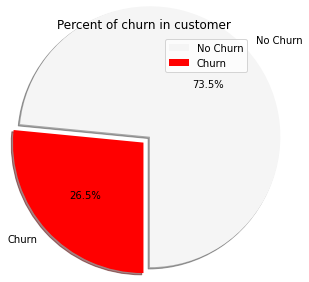

In [35]:
# Data to plot
labels =["No Churn","Churn"]
sizes = New_df['Churn'].value_counts(sort = True)

colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,radius=1.5)
plt.legend()
plt.title('Percent of churn in customer')
plt.show()

# Correlation

In [36]:
#correlation
corr = New_df.corr()


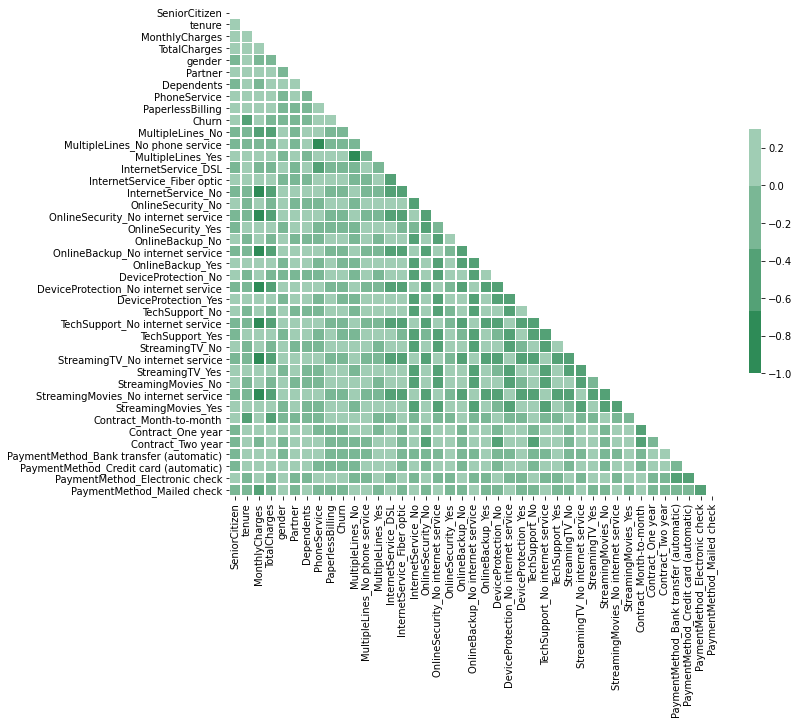

In [37]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap=sns.light_palette("seagreen", reverse=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Tenure variable is highly correlated with Contract Month to Month and Churn. MonthlyChages is correlated with most of the variables with No internete service and NO classes

<AxesSubplot:>

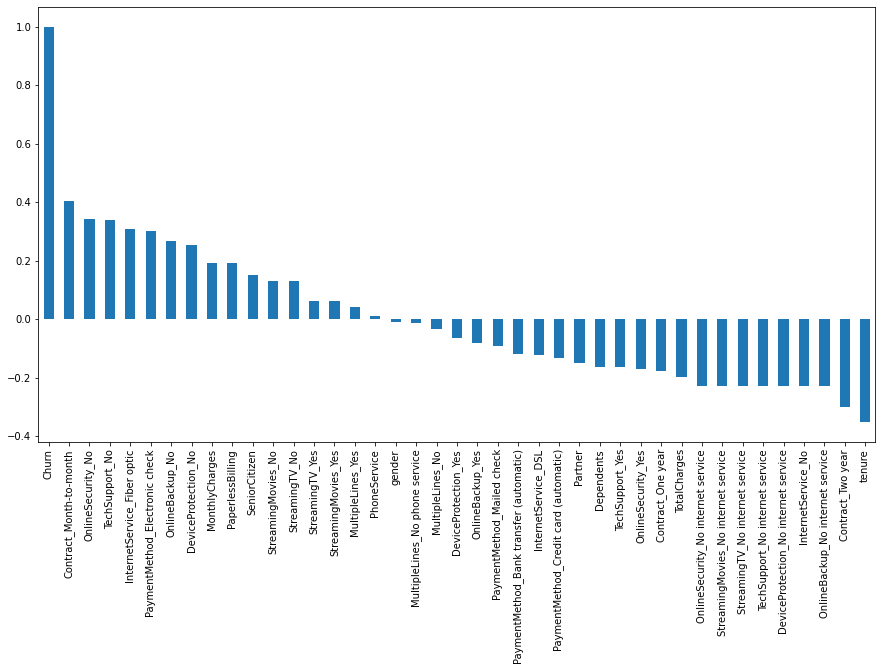

In [40]:
plt.figure(figsize=(15,8))
New_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

# RandomForest Classifier (Understanding feature importance)

It is used to measure the relative importance of each feature(variable)

In [27]:
X = New_df.loc[:, New_df.columns != 'Churn']
y = New_df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

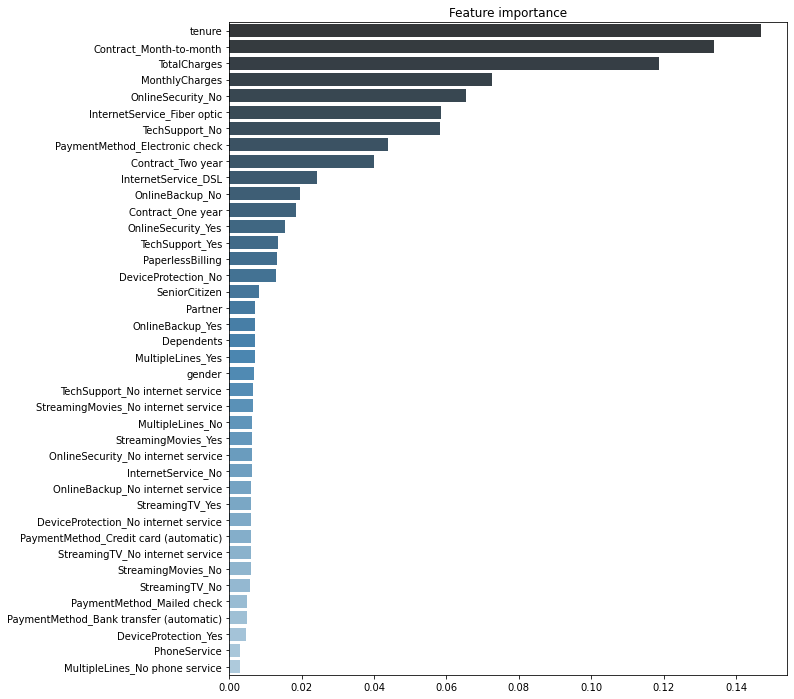

In [42]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

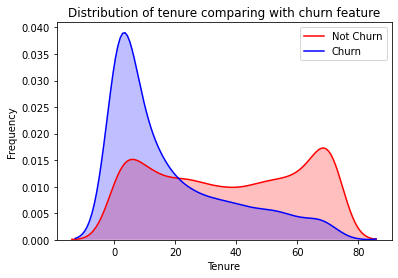

In [43]:
# tenure distibution 
g = sns.kdeplot(New_df.tenure[(New_df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(New_df.tenure[(New_df["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("Tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

Here we can see that the customers with tenure value between 0-20 tends to churn.So we get to the conclusion that the percentage of churn is more for new customers than old customers.

In [28]:
print(sorted(New_df["tenure"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]


# Splitting Dataset into Train And Test :

In [29]:
X = New_df.loc[:, New_df.columns != 'Churn']
y = New_df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [30]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the test data is 1409.


# Using Grid search CV and SVM classifier

In [31]:
# Define Model parameters to tune
model_parameters = {
        'kernel':['rbf', 'poly', 'linear'],
        'C':[1, 10, 100, 1000],
        'class_weight': ['balanced', None],
        'gamma': [0.0001, 0.001]
    }


In [ ]:
# Gridsearch the parameters to find the best parameters. 
model = SVC(probability=True)  # Support vector classifier 

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='f1')

gscv.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
# Re-fit the model with the best parameters
final_mod = SVC(**gscv.best_params_,probability=True)
final_mod.fit(x_train,y_train)

In [ ]:
confusion_matrix(y_test,final_mod.predict(x_test))

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,final_mod.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



# ROC

In [52]:
def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob, *args):
    '''
    Generate the train & test roc curve
    '''

    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)

    if len(args) == 0:
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        roc_plot(fpr, tpr, fpr_tst, tpr_tst)

    else:
        AUC_Valid = roc_auc_score(args[0], args[1])
        print("Train AUC = ", AUC_Train)
        print("Test AUC = ", AUC_Test)
        print("Validation AUC = ", AUC_Valid)
        fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
        fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
        fpr_val, tpr_val, thresholds = roc_curve(args[0], args[1])
        roc_plot(fpr, tpr, fpr_tst, tpr_tst, fpr_val, tpr_val)

In [53]:
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot
    '''

    fig = plt.plot(fpr, tpr, label='Train')
    fig = plt.plot(fpr_tst, tpr_tst, label='Test')

    if len(args) == 0:
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

    else:
        fig = plt.plot(args[0], args[1], label='Validation')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC curve using ")
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

Train AUC =  0.8446970550712907
Test AUC =  0.8583571668454181


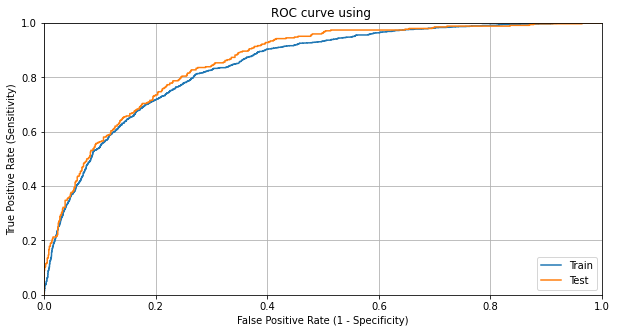

In [54]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = logistic_model.predict_proba(x_train)[:, 1]
test_prob = logistic_model.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

# END OF NOTEBOOK